In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import silhouette_score

%matplotlib inline

In [34]:
#read the data

data_path = 'E:\Desktop\Customer Data.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [35]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [37]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [38]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [39]:
df = df.fillna(df.median())

In [40]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [41]:
from sklearn import preprocessing

In [42]:
le = preprocessing.LabelEncoder()
df["CUST_ID"] = le.fit_transform(df["CUST_ID"])
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [43]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = df.columns
# Scale these variables using 'fit_transform'
df[varlist] = scaler.fit_transform(df[varlist])
df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.731857,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,-1.731470,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,-1.731083,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,-1.730696,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-1.730309,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.730309,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,1.730696,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,1.731083,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,1.731470,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


In [44]:
from sklearn.decomposition import PCA

In [45]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,1.000000,-0.236863,-0.111091,-0.140745,-0.136465,-0.081845,-0.084239,-0.021153,-0.172135,0.026535,-0.025797,-0.023154,-0.114390,-0.353792,-0.168465,-0.070606,0.043029,-0.180585
BALANCE,-0.236863,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,-0.111091,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,-0.140745,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,-0.136465,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,-0.081845,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,-0.084239,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.021153,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,-0.172135,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,0.026535,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275


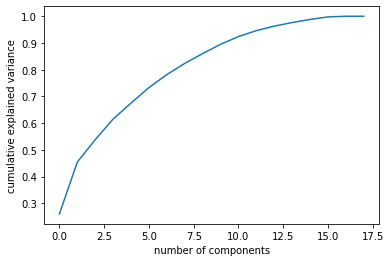

In [46]:
#the cumulative explained variance ratio as a function of the number of components
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [47]:
pca = PCA(n_components=18)
pca.fit(df)
X_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", X_pca.shape)

original shape:    (8950, 18)
transformed shape: (8950, 18)


In [48]:
print(pca.components_)
print(pca.explained_variance_)

[[-1.09359754e-01  1.14774047e-01  1.24081667e-01  4.09178035e-01
   3.45528967e-01  3.32597221e-01 -1.15908955e-02  3.12217177e-01
   2.93929335e-01  2.65091964e-01 -7.80812521e-02 -3.87239754e-02
   3.86516024e-01  2.22976759e-01  2.71555314e-01  6.76296699e-02
   1.24374735e-01  8.51851227e-02]
 [-1.23665058e-01  3.99625656e-01  1.26068889e-01  2.08892726e-02
   4.63279056e-02 -3.57810943e-02  4.33541363e-01 -2.05701337e-01
  -2.77276764e-02 -1.93332822e-01  4.29738386e-01  4.12974386e-01
  -3.82024619e-02  2.36251071e-01  2.42251358e-01  1.64932804e-01
  -1.96078318e-01  5.14351889e-04]
 [-1.56622841e-01 -1.25102124e-01 -3.91893112e-01  2.33072843e-01
   3.71776788e-01 -1.31854581e-01 -6.61989989e-02 -3.85403072e-01
   1.26421672e-01 -4.91973087e-01 -1.54259829e-01 -1.67863197e-01
  -9.06423262e-02  1.44089603e-01  2.39581721e-01 -2.00445103e-01
   8.08056837e-02  1.77479233e-02]
 [ 4.48731154e-01 -2.48903805e-01 -2.19110524e-01  9.83483218e-02
   8.09139698e-02  8.39755004e-02  2.

In [49]:
pca = PCA(n_components=12)
pca.fit(df)
X_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", X_pca.shape)

original shape:    (8950, 18)
transformed shape: (8950, 12)


In [50]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.731857,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,-1.731470,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,-1.731083,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,-1.730696,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-1.730309,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [51]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.511585,-0.772600,0.868651,-1.320208,-0.214126,0.212059,-0.119302,-0.821696,1.037292,1.012434,-0.327393,-0.166891
1,-0.860031,2.758602,0.849388,-0.624452,-0.676470,1.540197,0.261019,0.056244,0.805825,-0.082478,-0.883730,-0.832515
2,1.159944,-0.175912,0.621790,-2.100707,-1.959350,-1.059875,1.210613,0.319334,-0.797192,0.565600,-0.083835,-0.732075
3,-0.680277,0.278427,1.926998,-1.475861,-0.154484,0.483968,0.548081,-0.796280,0.140266,0.431197,0.269629,0.786897
4,-1.414493,-0.386092,0.790220,-1.630078,-0.420204,-0.231319,-0.140625,-0.517588,1.348385,0.639762,-0.343063,-0.392649


In [52]:
corr = X_pca.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
1,-0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000
2,0.000000,-0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000
3,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
4,-0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
5,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
6,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
7,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000
8,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.000000
9,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000


In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=X_pca , method="complete", metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
plt.show()

In [63]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(X_pca)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
silhouette_score(X_pca, clustering.labels_)

0.3883585932361274

In [173]:
def kmeans(X, n_clusters):
#     ss = StandardScaler()
#     X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.fit_predict(X)
    centroids = km.cluster_centers_
#     sns.scatterplot(X[:,0], X[:,1], hue=y_pred)
#     sns.scatterplot(centroids[:,0], centroids[:,1], s=100 , color='y')
#     plt.title("K-means")
#     plt.show()
#     print(km.labels_)
    print(silhouette_score(X, km.labels_))

#distortion function
def WCSS(x):
    wcss=[]
    for i in range(1,20):
        kmeans = KMeans(i)
        kmeans.fit(x)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)
    number_clusters = range(1,20)
    plt.plot(number_clusters,wcss)
    plt.title('The Elbow title')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

In [174]:
def hier(X, n_clusters):
#     ss = StandardScaler()
#     X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
#     plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
#     plt.title("Hierarchical")
#     plt.show()
#     print(hier.labels_)
    print(silhouette_score(X, hier.labels_))

In [175]:
def dbscan(X, eps, min_samples):
#     ss = StandardScaler()
#     X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
#     plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
#     plt.title("DBSCAN")
#     plt.show()
#     print(db.labels_)
    print(silhouette_score(X, db.labels_))

In [215]:
def gaussianmixture(X, n_components):
#     ss = StandardScaler()
#     X = ss.fit_transform(X)
    #covariance_type: This hyperparameter controls the degrees of freedom in the shape of each cluster
    #covariance_type="diag", covariance_type='full' , covariance_type="spherical"
    #‘full’: each component has its own general covariance matrix.
    # ‘tied’: all components share the same general covariance matrix.
    # ‘diag’: each component has its own diagonal covariance matrix.
    # ‘spherical’: each component has its own single variance.
    GMM = GaussianMixture(n_components=n_components, covariance_type='spherical', random_state=42)
    GMM.fit(X)
    labels = GMM.fit_predict(X)
#     plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
#     plt.title("GaussianMixture")
#     plt.show()
#     print(labels)
    print(silhouette_score(X, labels))
    
def best(X):
    n_components = np.arange(1, 21)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) 
                  for n in n_components]
    plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')

In [194]:
dbscan(X_pca, 1.2, 6)

0.110404720221111


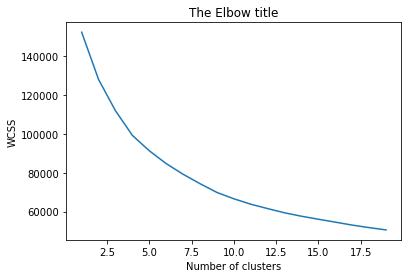

In [195]:
WCSS(X_pca)

In [196]:
kmeans(X_pca, 2)

0.20100195818196454


In [202]:
hier(X_pca, 2)

0.3883585932361274


In [216]:
gaussianmixture(X_pca, 2)

0.34095320947761915


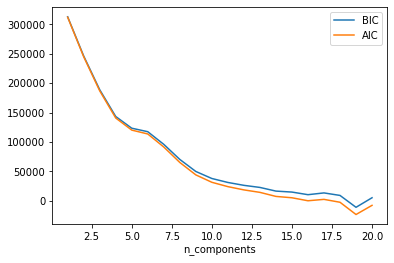

In [217]:
best(X_pca)